In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [3]:
data_path = r"C:\ineuron\Industry_ready_projects\Gesture_prediction\EMG_data_for_gestures-master (1)\EMG_data_for_gestures-master"

In [4]:
df = pd.DataFrame()

In [5]:
for i in os.listdir(data_path):
    if os.path.isdir(os.path.join(data_path,i)):
        for j in os.listdir(os.path.join(data_path,i)):
            temp = pd.read_csv(os.path.join(data_path,i,j),sep="\t")
            index = temp[temp['class']!=0].index
            temp=temp.iloc[index]
            df=pd.concat([df,temp],axis=0)

In [6]:
df.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
2287,2400,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001,1.0
2288,2401,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0
2289,2402,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0
2290,2403,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0
2291,2404,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0


In [6]:
df.shape

(4237908, 10)

In [7]:
df.describe()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
count,4.237908e+06,4.237908e+06,4.237908e+06,4.237908e+06,4.237908e+06,4.237908e+06,4.237908e+06,4.237908e+06,4.237908e+06,4.237907e+06
mean,3.113689e+04,-7.911481e-06,-9.416077e-06,-9.548735e-06,-9.637838e-06,-1.599724e-05,-1.085528e-05,-9.364637e-06,-9.696860e-06,1.265671e+00
std,1.868079e+04,1.631110e-04,1.192228e-04,1.241846e-04,2.257728e-04,2.724188e-04,2.151405e-04,1.527311e-04,1.720933e-04,1.989693e+00
min,0.000000e+00,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,0.000000e+00
25%,1.529000e+04,-3.000000e-05,-4.000000e-05,-4.000000e-05,-6.000000e-05,-8.000000e-05,-6.000000e-05,-4.000000e-05,-3.000000e-05,0.000000e+00
50%,3.054600e+04,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,0.000000e+00
75%,4.580400e+04,2.000000e-05,2.000000e-05,3.000000e-05,4.000000e-05,5.000000e-05,3.000000e-05,2.000000e-05,1.000000e-05,2.000000e+00
max,9.714400e+04,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,7.000000e+00


In [12]:
index = df[df['class']==0].index
index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            49354, 49355, 49356, 49357, 49358, 49359, 49360, 49361, 49362,
            49363],
           dtype='int64', length=2725157)

In [14]:
df= df.drop(index)
df

In [9]:
records =df.to_dict('records')

In [10]:
records

[{'time': 1,
  'channel1': 1e-05,
  'channel2': -2e-05,
  'channel3': -1e-05,
  'channel4': -3e-05,
  'channel5': 0.0,
  'channel6': -1e-05,
  'channel7': 0.0,
  'channel8': -1e-05,
  'class': 0.0},
 {'time': 5,
  'channel1': 1e-05,
  'channel2': -2e-05,
  'channel3': -1e-05,
  'channel4': -3e-05,
  'channel5': 0.0,
  'channel6': -1e-05,
  'channel7': 0.0,
  'channel8': -1e-05,
  'class': 0.0},
 {'time': 6,
  'channel1': -1e-05,
  'channel2': 1e-05,
  'channel3': 2e-05,
  'channel4': 0.0,
  'channel5': 1e-05,
  'channel6': -2e-05,
  'channel7': -1e-05,
  'channel8': 1e-05,
  'class': 0.0},
 {'time': 7,
  'channel1': -1e-05,
  'channel2': 1e-05,
  'channel3': 2e-05,
  'channel4': 0.0,
  'channel5': 1e-05,
  'channel6': -2e-05,
  'channel7': -1e-05,
  'channel8': 1e-05,
  'class': 0.0},
 {'time': 8,
  'channel1': -1e-05,
  'channel2': 1e-05,
  'channel3': 2e-05,
  'channel4': 0.0,
  'channel5': 1e-05,
  'channel6': -2e-05,
  'channel7': -1e-05,
  'channel8': 1e-05,
  'class': 0.0},
 {'ti

In [9]:
df.isnull().sum()

time        0
channel1    0
channel2    0
channel3    0
channel4    0
channel5    0
channel6    0
channel7    0
channel8    0
class       1
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
dataset=df.drop(columns=["time"])
Class = dataset["class"]
dataset.dataframeName = 'EMG-data.csv'
print(Class.unique())
print("Value Count :\n", dataset["class"].value_counts())

[1. 2. 3. 4. 5. 6. 7.]
Value Count :
 6.0    253009
5.0    251733
4.0    251570
1.0    250055
3.0    249494
2.0    243193
7.0     13696
Name: class, dtype: int64


In [11]:
dataset.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0.0
1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0.0
2,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0
3,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0
4,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0


In [12]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [13]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

C:\Users\prakh\AppData\Local\Temp\ipykernel_26316\406100316.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column])
C:\Users\prakh\AppData\Local\Temp\ipykernel_26316\406100316.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[column])
C:\Users\prakh\AppData\Local\Temp\ipyk

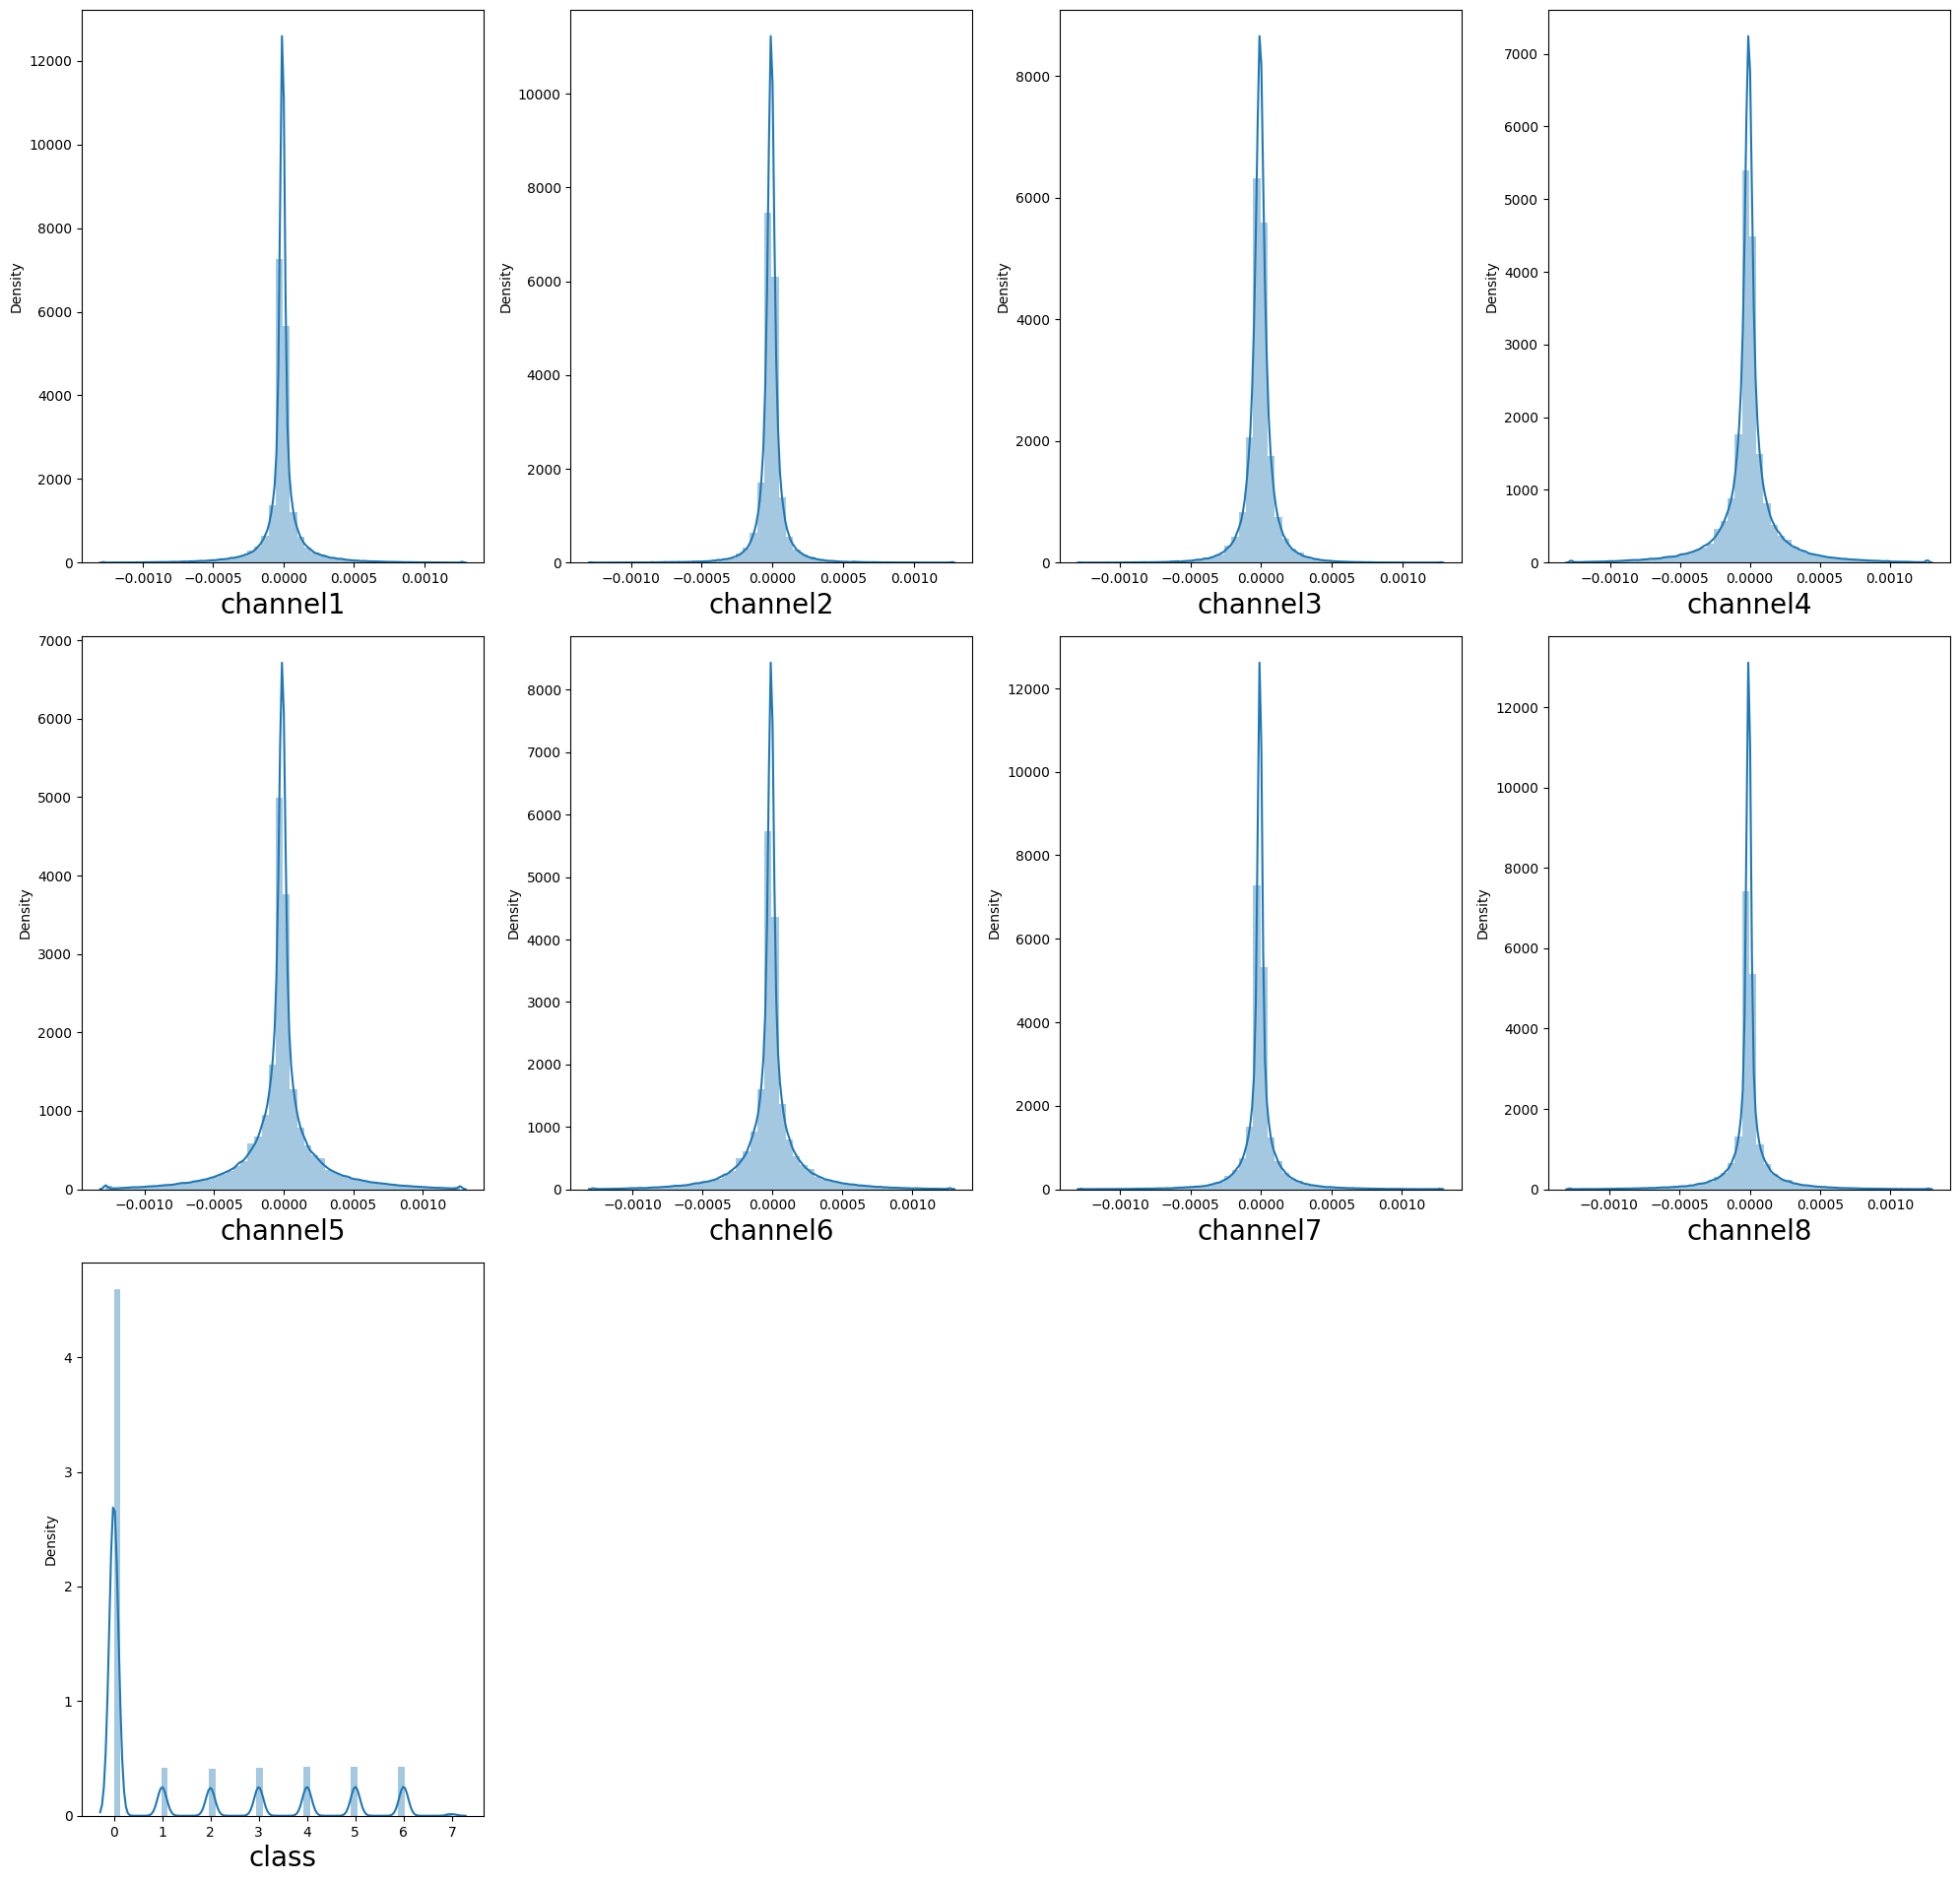

In [14]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dataset:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(dataset[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [15]:
plotCorrelationMatrix(dataset, 8)

NameError: name 'plotCorrelationMatrix' is not defined

In [ ]:
plotScatterMatrix(dataset, 20, 10)

In [12]:
features = dataset.drop(columns=["class"])
display(features.head())

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001
1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001
2,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
3,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
4,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001


In [13]:
Class = dataset["class"]

In [18]:
print(type(Class))
print(type(features))

Class = Class.values
features = features.values

print(type(Class))
print(type(features))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [14]:
# split in training 70%, validation 10 %,  test 20% test 
from sklearn.model_selection import train_test_split
# 80 and 20
x_train, x_test, y_train, y_test = train_test_split(features, Class, test_size=0.2, random_state=1)

In [15]:
scaler = StandardScaler()

In [16]:
x_train_scaled =scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
x_train_scaled

array([[-0.25768892,  0.41419342, -1.45441294, ...,  0.23611321,
        -0.00383588, -0.11811399],
       [-1.72875451,  0.4980577 ,  1.2859373 , ...,  0.00373941,
        -0.20011997, -0.64075759],
       [-0.01251132, -0.08899222, -0.08423782, ...,  0.46848702,
        -0.00383588,  0.05610054],
       ...,
       [-1.79004891,  0.1626006 ,  0.15755779, ..., -0.32158392,
        -0.52726013, -0.35040004],
       [ 0.04878308, -0.08899222, -0.08423782, ..., -0.08921012,
         0.12702019,  0.05610054],
       [-0.13510012, -0.17285649, -0.80962465, ..., -0.36805868,
         0.19244822, -0.35040004]])

In [34]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore',drop='first')

In [39]:
# y_train_enc=enc.fit_transform(y_train.reshape(-1,1))

In [41]:
# y_train_enc.toarray()

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,recall_score,roc_auc_score, precision_score,f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix



In [19]:
# classifiers = [#manhattan,4,distance
#     # KNeighborsClassifier(metric='manhattan',weights='distance',n_neighbors=4),
#     SVC(C=3, gamma=0.04), #2,0.01
#     # DecisionTreeClassifier(criterion= 'entropy',max_depth= 7,max_features= 'auto',random_state= 20),
#     # RandomForestClassifier(bootstrap=False,max_depth=8,max_features='sqrt',min_samples_leaf=1,
#     #                       min_samples_split=2,n_estimators=100),
#     # GradientBoostingClassifier(),
#     # GaussianNB(),
#     # LinearDiscriminantAnalysis(),
#     # LogisticRegression(C=0.05, penalty='l2')
#     ]

In [45]:
# import warnings
# warnings.filterwarnings('always')
# from time import time 
# clf_performace={'accuracy':[],'f1score':[],'training_time':[],'testing_time':[]}
# for clfs in classifiers:
#     #pipeline.set_params(estimator = clfs)
#     name = clfs.__class__.__name__
#     accuracy=[]
#     f1score=[]
#     recall=[]
#     precision=[]
#     training_time=[]
#     testing_time=[]
#     for i in range(1,37):
#         training_start=time()
#         clf = make_pipeline(StandardScaler(), clfs)
#         clf.fit(x_train_scaled, y_train)
#         training_end=time()
#         testing_start=time()
#         y_pred=clf.predict(x_test_scaled)
#         testing_end=time()
#         acc=accuracy_score(y_test,y_pred)
#         recall.append(recall_score(y_test,y_pred,average='macro'))
#         #precision.append(precision_score(y_test,y_pred,average='macro'))
#         f1score.append(f1_score(y_test,y_pred,average='macro'))
#         accuracy.append(acc)
#         training_time.append(training_end-training_start)
#         testing_time.append(testing_end-testing_start)
#         #print('subject {} accuracy is {}'.format(i,acc))
#     print(name,np.mean(accuracy))
#     clf_performace['accuracy'].append(accuracy)
#     clf_performace['f1score'].append(f1score)
#     clf_performace['training_time'].append(np.mean(training_time))
#     clf_performace['testing_time'].append(np.mean(testing_time))

KNeighborsClassifier 0.9782345542968114


In [ ]:
# KNeighborsClassifier 0.9782345542968114

In [20]:
estimators=[]
accuracy=[]
f1_macro=[]


In [23]:
##function for returning an estimator class name 
def print_estimator_name(estimator):
    return estimator.__class__.__name__

In [22]:
svc=SVC(C=100,kernel='poly',gamma=0.01,decision_function_shape='ovo')

In [24]:
svc.fit(x_train,y_train)
y_test_pred=svc.predict(x_test)
y=f1_score(y_test,y_test_pred,average='macro') 
x=confusion_matrix(y_test,y_test_pred)
a=accuracy_score(y_test,y_test_pred)
print(y)
print(x)
print(a)
estimators.append(print_estimator_name(svc))
f1_macro.append(y)
accuracy.append(a)


In [ ]:
plot_confusion_matrix(svc,x_test,y_test)
plt.show()

In [10]:
tr = pd.read_csv(r"C:\ineuron\Industry_ready_projects\Gesture_prediction\Gesture_prediction\artifact\12_12_2022_19_21_13\data_ingestion\ingested\train.csv")

In [14]:
tr.columns[1:]

Index(['channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7',
       'channel8', 'class'],
      dtype='object')

In [7]:
TargetValueMapping = {1:0,2:1,3:2,4:3,5:4,6:5,7:6}

In [22]:
class TargetValueMapping:
    def __init__(self):
        self.mapping = {1:int(0),2:int(1),3:int(2),4:int(3),5:int(4),6:int(5),7:int(6)}

    def to_dict(self):
        return self.mapping

    def reverse_mapping(self):
        mapping_response = self.mapping
        return dict(zip(mapping_response.values(), mapping_response.keys()))

In [23]:
target_feature_train_df=df['class']
target_feature_train_df = target_feature_train_df.replace( TargetValueMapping().mapping)

In [24]:
np.unique(target_feature_train_df
)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6., nan])

In [17]:
target_feature_train_df = target_feature_train_df.replace( TargetValueMapping().reverse_mapping())

In [18]:
np.unique(target_feature_train_df
)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7., nan])